In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [4]:
seed =0
np.random.seed (seed)
tf.random.set_seed (seed)

In [5]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [6]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float32') /255
X_test = X_test.reshape(X_test.shape[0], 28,28, 1).astype('float32') /255

In [7]:
Y_train = np_utils.to_categorical (Y_train)
Y_test = np_utils.to_categorical (Y_test)

In [8]:
model = Sequential()
model.add(Conv2D (32,kernel_size=(3,3),input_shape= (28,28,1),activation='relu'))
model.add(Conv2D (64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add( Dense( 128, activation= 'relu'))
model.add(Dropout(0.5))
model.add( Dense( 10, activation= 'softmax'))

In [9]:
model.compile (loss= 'categorical_crossentropy',
               optimizer= 'adam',
               metrics=['accuracy'])

In [10]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only= True )
early_stopping_callback= EarlyStopping(monitor='val_loss', patience=10)

In [11]:
history= model.fit( X_train, Y_train, validation_data= (X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])
#2-dim으로 바꿨는데 고려를 안해줘서 에러가 나는게 아닐까???  
# 다시 GPU로 바꿔서 돌려보니 돌아감

print("\n Test Accuracy: %.4f" % (model.evaluate( X_test, Y_test )[1]))


Epoch 00001: val_loss improved from inf to 0.05385, saving model to ./model/01-0.0539hdf5

Epoch 00002: val_loss improved from 0.05385 to 0.04263, saving model to ./model/02-0.0426hdf5

Epoch 00003: val_loss improved from 0.04263 to 0.03396, saving model to ./model/03-0.0340hdf5

Epoch 00004: val_loss did not improve from 0.03396

Epoch 00005: val_loss did not improve from 0.03396

Epoch 00006: val_loss improved from 0.03396 to 0.03176, saving model to ./model/06-0.0318hdf5

Epoch 00007: val_loss did not improve from 0.03176

Epoch 00008: val_loss improved from 0.03176 to 0.03152, saving model to ./model/08-0.0315hdf5

Epoch 00009: val_loss did not improve from 0.03152

Epoch 00010: val_loss did not improve from 0.03152

Epoch 00011: val_loss did not improve from 0.03152

Epoch 00012: val_loss improved from 0.03152 to 0.02913, saving model to ./model/12-0.0291hdf5

Epoch 00013: val_loss did not improve from 0.02913

Epoch 00014: val_loss did not improve from 0.02913

Epoch 00015: val_

In [12]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

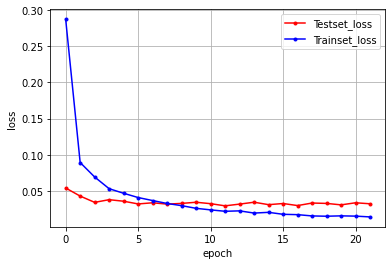

In [13]:
x_len = np.arange(len(y_loss))
plt.plot( x_len, y_vloss, marker= '.', c='red', label='Testset_loss')
plt.plot( x_len,y_loss, marker='.', c='blue',label= 'Trainset_loss')

plt.legend( loc= 'upper right')

plt.grid()
plt.xlabel ('epoch')
plt.ylabel ('loss')
plt.show()